##### <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 9 submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">MounikaTarigopula & AmulyaSaridey</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You will predict the type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn as sci
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import collections
from collections import Counter
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [3]:
%%time
crimes_dataSet = pd.read_csv('Crimes.csv')
crimes_dataSet.head()

CPU times: user 17.1 s, sys: 879 ms, total: 18 s
Wall time: 18 s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.

This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
    4.  For a given K, filter the dataset to extract the most popular K Primary Types and report what percentage of the total dataset this amounts to. Lets call this percentage, F. Now, find what fraction of this filtered data can be supported in your analysis on your local machine. Lets call this P. For example, of the approximately 7 million entries, say for K=3, we find that the top three types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine can handle all 3.5 million entries in you ML analysis. Say you find out that you can only handle 60% of this, which means your working dataset will be 2.1 million entries.  
5.  For each K=2,3,4,5 (and associated percentage 'P'), you should train a model and report the accuracy. (Refer to other tasks)

Hint: Split the data into training and testing in the ratio of 80:20.

### Part 1:

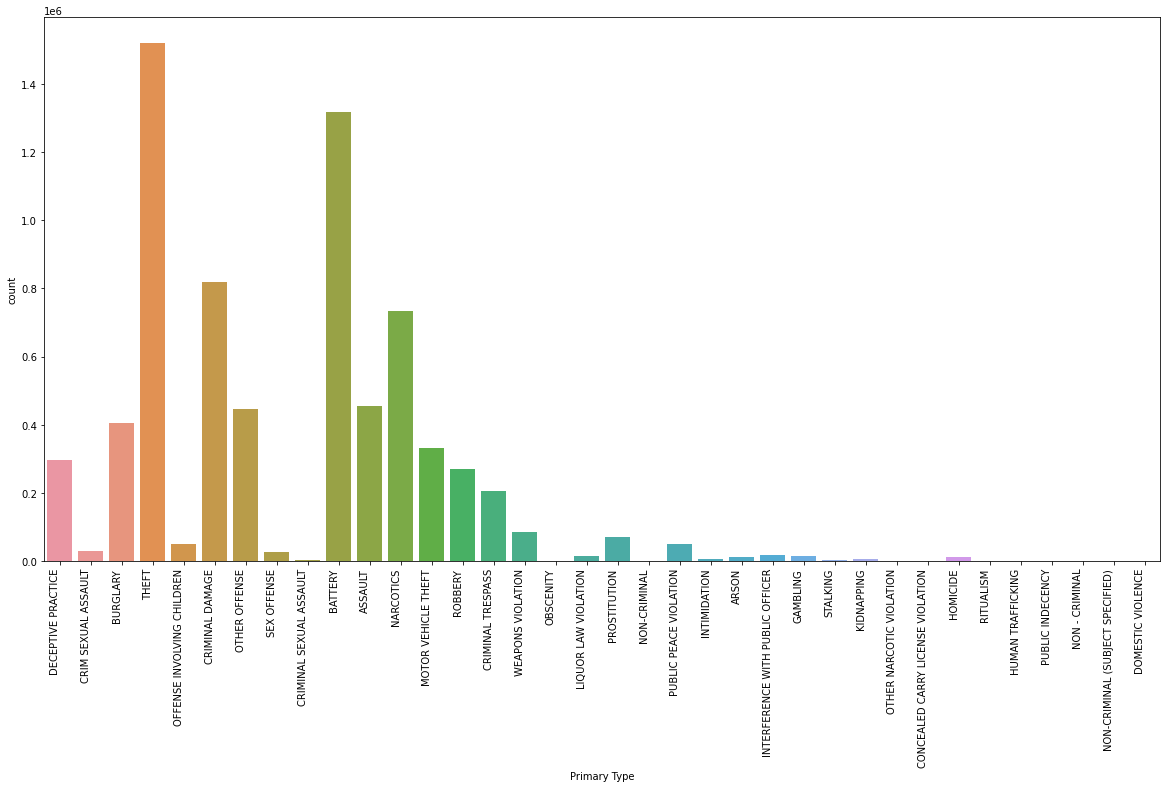

In [3]:
#Now we are plotting the histogram for the column('Primary Type') in crimes_dataSet.
#For plotting we are using seaborn library. 

plt.figure(figsize=(20,10))
axis = sns.countplot(x='Primary Type',data = crimes_dataSet)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Part 2:

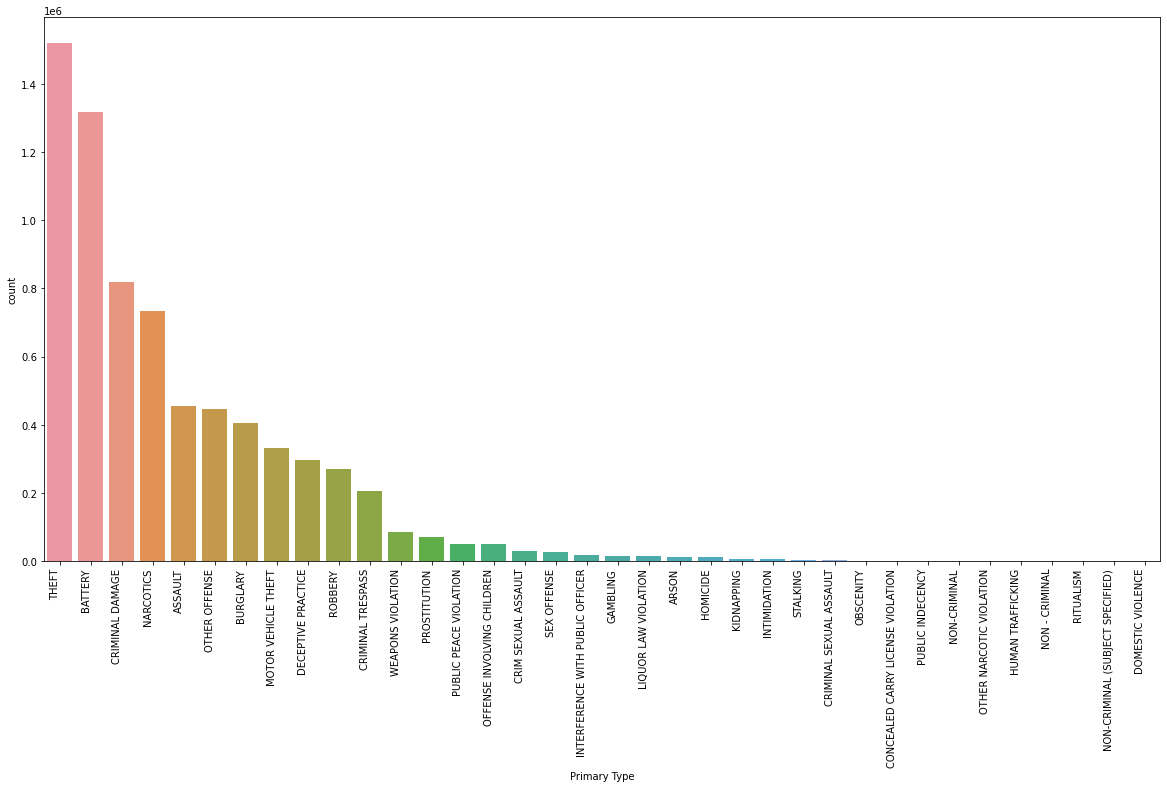

In [4]:
#We are sorting the data in 'Primary Type' Column in the crimes_dataSet in DESCENDING ORDER 
sort_values = crimes_dataSet['Primary Type'].value_counts().index

#plotting the histogram by using seaborn.
plt.figure(figsize=(20,10))  
axis = sns.countplot(x='Primary Type',data = crimes_dataSet,order = sort_values)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Part 3:

In [5]:
#We are trying to get the top 5 common values in 'Primary Type'column.We are using counter to get the count
#of each variable. 
data = crimes_dataSet['Primary Type'].to_numpy() 
count = Counter(data)
k = np.array([])
#Top 5 variables
for i in count.most_common(5):
    k = np.append(k,i[0])
print("Top 5 values are: ", +k)
k.shape

Top 5 values are:  ['THEFT' 'BATTERY' 'CRIMINAL DAMAGE' 'NARCOTICS' 'ASSAULT']


(5,)

In [6]:
crimes_data = crimes_dataSet.copy()
crimes_data['Block'] = crimes_data['Block'].str.slice(stop=3)
crimes_data['Date'] = crimes_data['Date'].str.slice(stop=2)
crimes_data['Arrest'] = np.where(crimes_data['Arrest']==True, 1, 0)
crimes_data['Domestic']= np.where(crimes_data['Domestic']==True, 1, 0)
class_mapping = {label:index+1 for index,label in 
                 enumerate(np.unique(crimes_data['Primary Type']))}
crimes_data['Primary Type'] = crimes_data['Primary Type'].map(class_mapping)
class_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(crimes_data['Description']))}
crimes_data['Description'] = crimes_data['Description'].map(class_mapping)
crimes_data['Location Description'] = crimes_data['Location Description'].astype(str)
class_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(crimes_data['Location Description']))}
crimes_data['Location Description'] = crimes_data['Location Description'].map(class_mapping)


In [7]:
crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01,016,1153,10,225,158,0,0,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10,092,0281,6,325,158,0,0,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03,026,0620,4,483,139,0,0,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09,060,0810,35,350,158,0,0,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08,001,0281,6,325,114,0,0,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [8]:
crimes_df = crimes_data.copy()
crimes_df.drop(columns = ['Block','ID','FBI Code','Case Number','Description','Date',
                         'IUCR','Location Description','X Coordinate','Y Coordinate','Updated On',
                         'Latitude','Longitude','Location'],axis = 1,inplace = True)
crimes_df.dropna(inplace = True)
crimes_df.head()

,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year
0,10,0,0,412,4.0,8.0,45.0,2001
1,6,0,0,2222,22.0,21.0,73.0,2017
2,4,0,0,835,8.0,18.0,70.0,2017
3,35,0,0,313,3.0,20.0,42.0,2017
4,6,0,0,122,1.0,42.0,32.0,2017


In [9]:
# creating data frames when k = 2,3,4,5
def generate(df,k):
    return df[df['Primary Type'].isin(df['Primary Type'].value_counts().head(k).keys().tolist())]

In [10]:
def percentage(df,k):
    percent = round(generate(df,k).shape[0]*100 / df.shape[0],3)
    print(f'We are taking the top {k} class of Primary Type which gives {percent}% of total data')

In [11]:
# top 5 classes and their percentage in total data
t0 = time.process_time()
percentage(crimes_df,2)
percentage(crimes_df,3)
percentage(crimes_df,4)
percentage(crimes_df,5)
t1 = time.process_time()
total = t1-t0
print("Time to run = "+str(total) +" ns")

We are taking the top 2 class of Primary Type which gives 39.452% of total data
We are taking the top 3 class of Primary Type which gives 50.818% of total data
We are taking the top 4 class of Primary Type which gives 60.934% of total data
We are taking the top 5 class of Primary Type which gives 67.242% of total data
Time to run = 1.3553169999999994 ns


In [12]:
def train_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaler_X_train = scaler.transform(X_train)
    scaler_X_test = scaler.transform(X_test)
    
    rf_model = rf(n_jobs=15,n_estimators=50,random_state=0) 
    rf_model.fit(scaler_X_train,y_train)
    
    predictions = rf_model.predict(scaler_X_test)
    accuracy = accuracy_score(y_test,predictions)
    
    print("Model accuracy is {} ".format(accuracy))
    print("F1 score is " + str(f1_score(y_test, predictions, average='weighted')))
    print("Recall score is " + str(recall_score(y_test, predictions, average='weighted')))
    print("Precision score is " + str(precision_score(y_test, predictions, average='weighted')) + '\n')

### When k= 2

In [13]:
%%time
df2 = generate(crimes_df,2)
X = df2.drop(axis = 1,labels = ['Primary Type'])
y = df2['Primary Type']
print(f"When k=2 : ")
train_model(X,y)

When k=2 : 
Model accuracy is 0.7601244246993808 
F1 score is 0.7553627303107068
Recall score is 0.7601244246993808
Precision score is 0.768654671404818

CPU times: user 9min 2s, sys: 10.9 s, total: 9min 13s
Wall time: 2min 53s


### AWS Result when K = 2: 

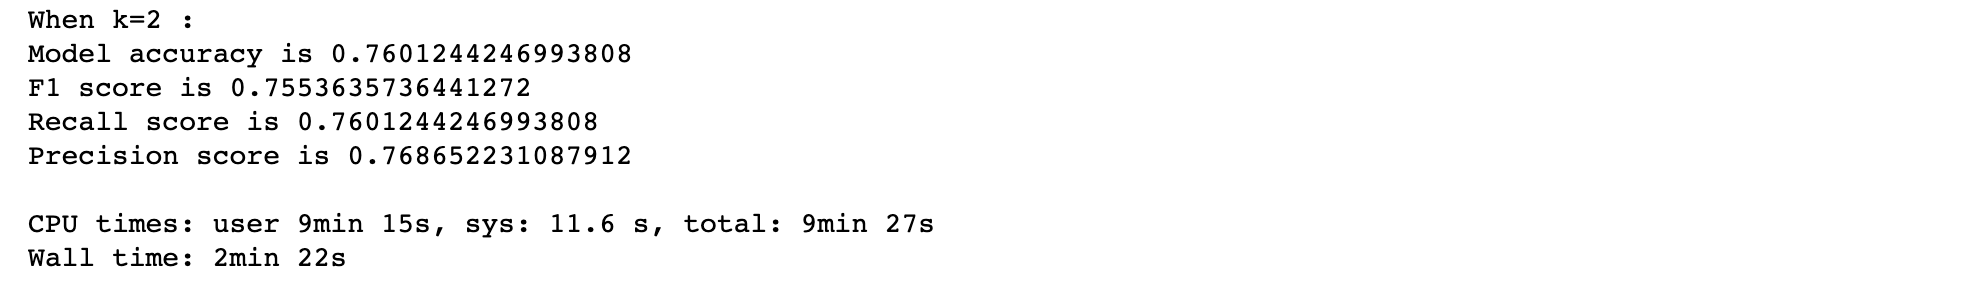

### When k = 3:

In [14]:
%%time
df3 = generate(crimes_df,3)
X = df3.drop(axis = 1,labels = ['Primary Type'])
y = df3['Primary Type']
print(f"When k=3 : ")
train_model(X,y)

When k=3 : 
Model accuracy is 0.5916028195828608 
F1 score is 0.5562916160809285
Recall score is 0.5916028195828608
Precision score is 0.5712908572760776

CPU times: user 12min 23s, sys: 16.2 s, total: 12min 39s
Wall time: 4min 41s


### AWS Result when K=3:

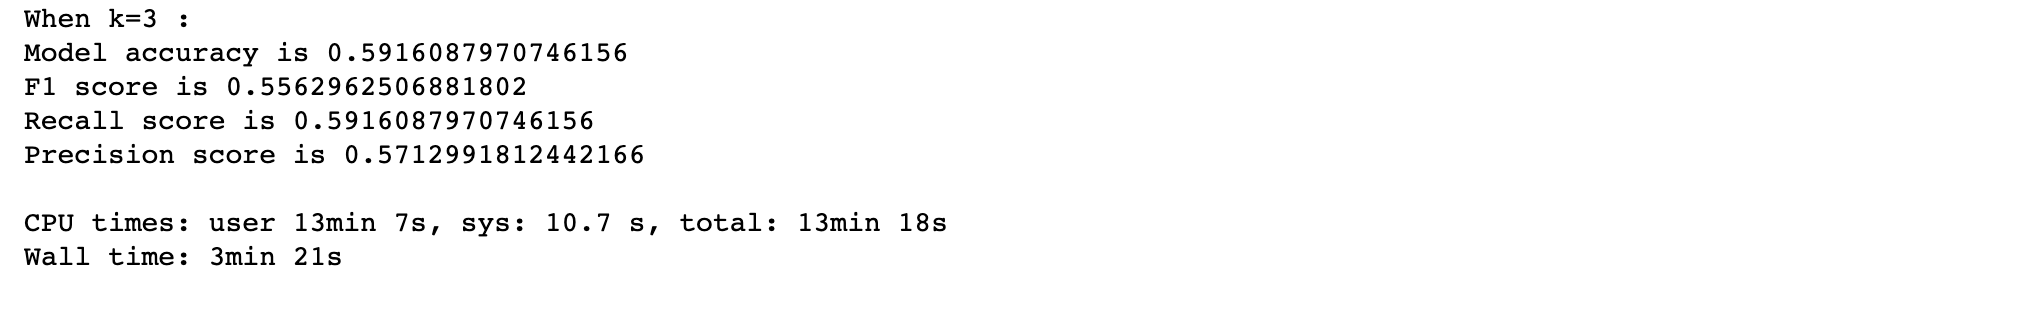

### When k = 4:

In [15]:
%%time
df4 = generate(crimes_df,4)
X = df4.drop(axis = 1,labels = ['Primary Type'])
y = df4['Primary Type']
print(f"When k=4 : ")
train_model(X,y)

When k=4 : 
Model accuracy is 0.6166208245107435 
F1 score is 0.5814657279531035
Recall score is 0.6166208245107435
Precision score is 0.5980623878935363

CPU times: user 15min 27s, sys: 17.8 s, total: 15min 45s
Wall time: 5min 11s


### AWS Result when k=4:

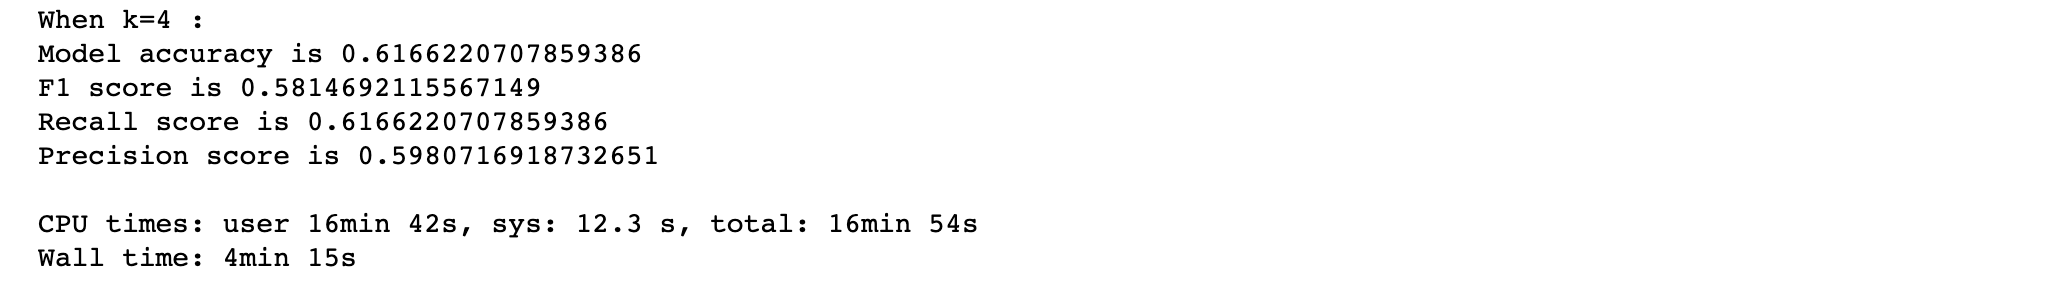

### When k = 5:

In [16]:
%%time
df5 = generate(crimes_df,5)
X = df5.drop(axis = 1,labels = ['Primary Type'])
y = df5['Primary Type']
print(f"When k=5 : ")
train_model(X,y)

When k=5 : 
Model accuracy is 0.5588291098497254 
F1 score is 0.5014760014719394
Recall score is 0.5588291098497254
Precision score is 0.5040177984369326

CPU times: user 17min 35s, sys: 21.5 s, total: 17min 56s
Wall time: 6min 14s


### AWS Result when K = 5:

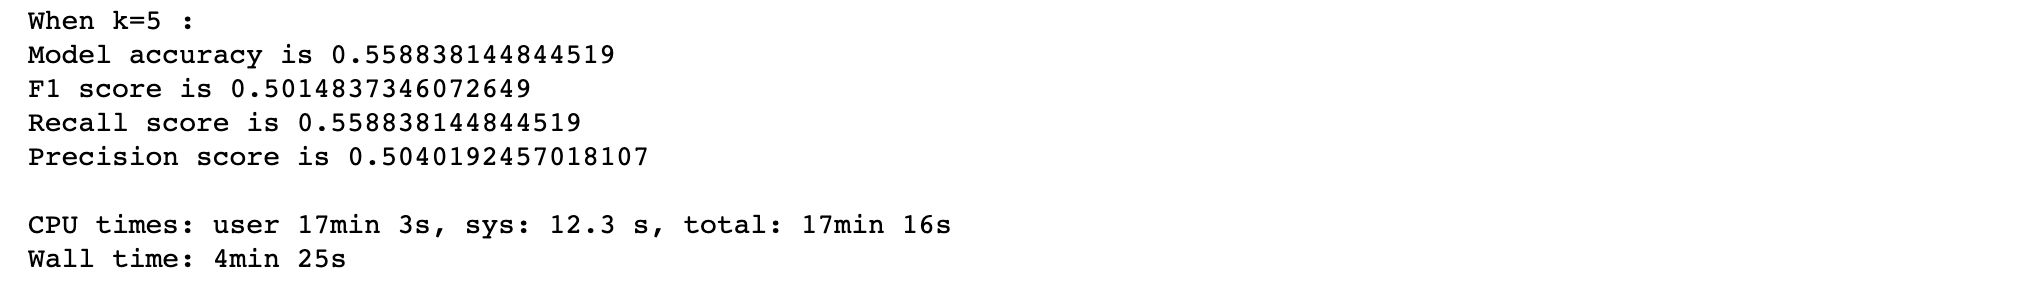

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [17]:
crime_num_df = crimes_dataSet.copy()
crime_num_df.drop(columns = ['Block','ID','FBI Code','Case Number','Date','Year',
                         'IUCR','Location Description','X Coordinate','Y Coordinate','Updated On',
                         'Latitude','Longitude','Location'],axis = 1,inplace = True)
crime_num_df.dropna(inplace = True)
crime_num_df.head()

,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,412,4.0,8.0,45.0
1,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,False,False,2222,22.0,21.0,73.0
2,BURGLARY,UNLAWFUL ENTRY,False,False,835,8.0,18.0,70.0
3,THEFT,OVER $500,False,False,313,3.0,20.0,42.0
4,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,False,False,122,1.0,42.0,32.0


In [18]:
#Converting the Categorical data into Numerical data  
lb_make = preprocessing.LabelEncoder()
crime_num_df["Primary Type"] = lb_make.fit_transform(crime_num_df["Primary Type"])
crime_num_df["Description"] = lb_make.fit_transform(crime_num_df["Description"])
crime_num_df["Arrest"] = lb_make.fit_transform(crime_num_df["Arrest"])
crime_num_df["Domestic"] = lb_make.fit_transform(crime_num_df["Domestic"])
crime_num_df["District"] = lb_make.fit_transform(crime_num_df["District"])
crime_num_df["Ward"] = lb_make.fit_transform(crime_num_df["Ward"])
crime_num_df["Community Area"] = lb_make.fit_transform(crime_num_df["Community Area"])
crime_num_df.head()

,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,9,224,0,0,412,3,7,45
1,5,324,0,0,2222,20,20,73
2,3,482,0,0,835,7,17,70
3,33,349,0,0,313,2,19,42
4,5,324,0,0,122,0,41,32


# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [20]:
#Geting X,y from data set
t0 = time.time()
X = crime_num_df.drop(axis = 1,labels = ['Primary Type'])
y = crime_num_df['Primary Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [22]:
#Running the RandomForestClassifier model
model = rf(n_estimators = 15) 
model.fit(scaler_X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [23]:
#Calculating the acurracy,F1 Score,Recall Score,Precision Score
y_pred = model.predict(scaler_X_test)
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print("Model accuracy {} ".format(accuracy))
print("The F1 score is " + str(f1_score(y_test, y_pred, average='weighted')))
print("The recall score is " + str(recall_score(y_test, y_pred, average='weighted')))
print("The precision score is " + str(precision_score(y_test, y_pred, average='weighted')) + '\n')

Model accuracy 0.9379311549408723 
The F1 score is 0.930518692159879
The recall score is 0.9379311549408723
The precision score is 0.9338885270219505



In [25]:
t1 = time.time()
timetaken = t1-t0
print("The time taken for model on Laptop : ",round(timetaken,2),"seconds")

The time taken for model on Laptop :  716.58 seconds


# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.
Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

### AWS Result when i run the model (Task 3):

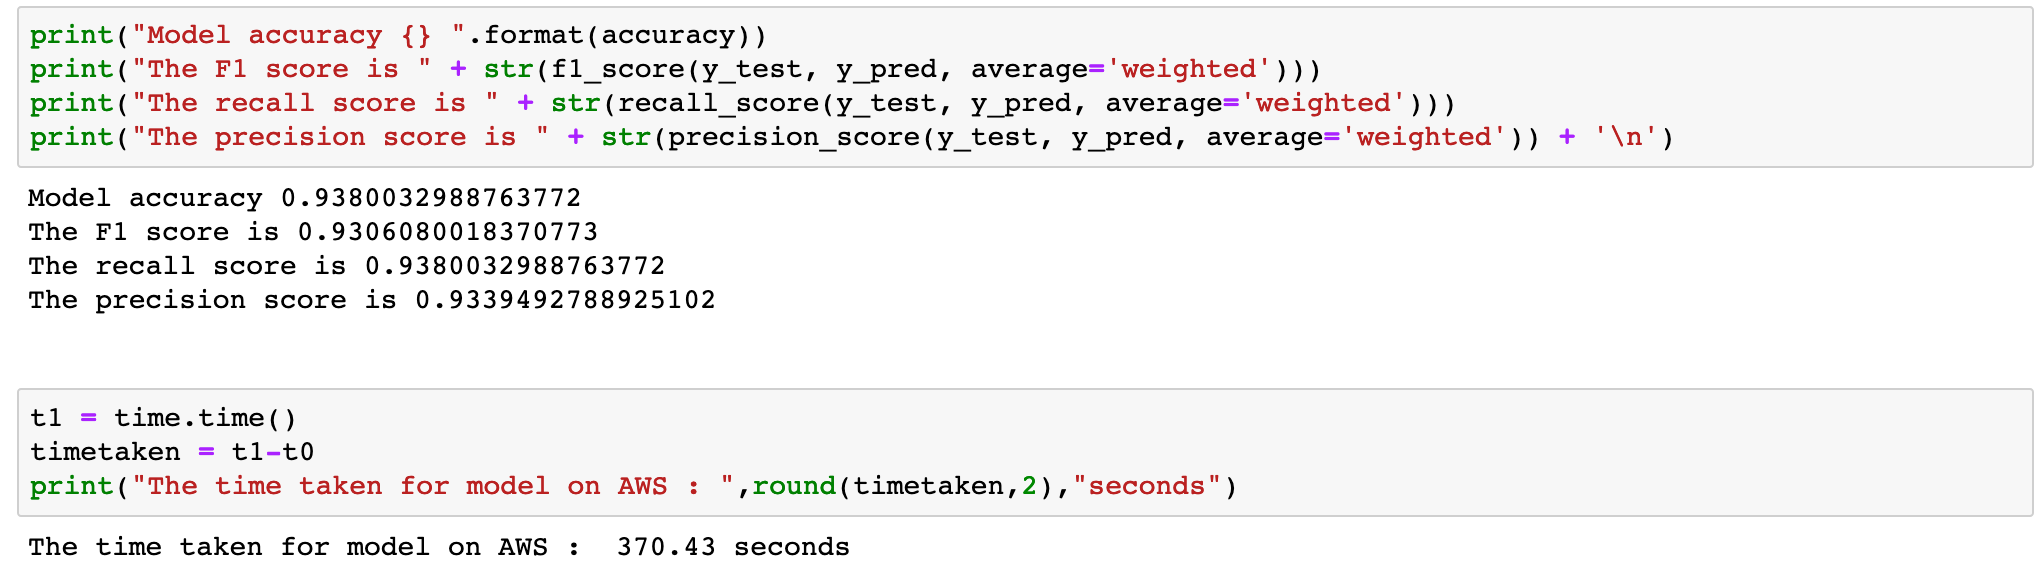

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [26]:
#Running the K-fold Cross Validation
t0 = time.time()
cross_validation = cross_val_score(model,Xs,y,cv = 5)
print(cross_validation)
print('cross validation mean when cv = 5 is {}'.format(np.mean(cross_validation)))
t1 = time.time()
timetaken = t1-t0
print("The time taken for cross validation on Laptop : ",round(timetaken,2),"seconds")

[0.92583148 0.93108204 0.93681103 0.93945909 0.94006657]
cross validation mean when cv = 5 is 0.9346500396513047
The time taken for cross validation on Laptop :  1985.19 seconds


### AWS Result: 

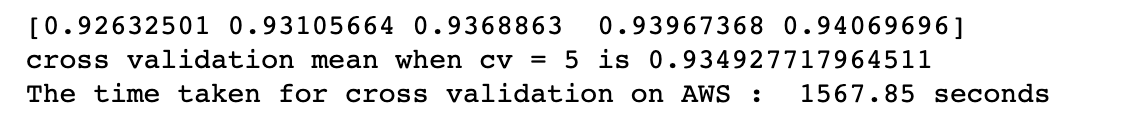